In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import f

In [2]:
df = pd.read_csv('conjunto_de_datos_tmodulo_enut_2019.csv',encoding='latin-1')
colums = ['EDAD_V','SEXO','NIV','P5_1','P5_3_1','P5_3_2','P5_3_3','P5_3_4','P5_6_6','P5_7','P5_7A','P6_10_7','P6_13_3','P6_13_5','P6_13_6','P6_8_2','P6_6_3','P6_5_2','P6_4_3','P6_3_1']
vec = ['P6_10A_7','P6_13A_3','P6_13A_5','P6_13A_6','P6_8A_2','P6_6A_3','P6_5A_2','P6_4A_3']
for x in range(len(vec)):
    tot_horas = 0
    tot_min = 0
    for i in range(4):
        nom_col = vec[x]
        nom_col = nom_col + '_' + str(i+1)
        colums.append(nom_col)

df_nuevo = df[colums]

In [3]:
df_nuevo['P6_13_3'] = df_nuevo['P6_13_3'].replace({np.nan: 0})
df_nuevo['P6_13_5'] = df_nuevo['P6_13_5'].replace({np.nan: 0})
df_nuevo['P6_13_6'] = df_nuevo['P6_13_6'].replace({np.nan: 0})
df_nuevo['P6_10_7'] = df_nuevo['P6_10_7'].replace({np.nan: 0})
df_nuevo['P6_8_2'] = df_nuevo['P6_8_2'].replace({np.nan: 0})
df_nuevo['P6_6_3'] = df_nuevo['P6_6_3'].replace({np.nan: 0})
df_nuevo['P6_5_2'] = df_nuevo['P6_5_2'].replace({np.nan: 0})
df_nuevo['P6_4_3'] = df_nuevo['P6_4_3'].replace({np.nan: 0})
df_nuevo['P6_13_3'] = df_nuevo['P6_13_3'].replace({2: 0})
df_nuevo['P6_13_5'] = df_nuevo['P6_13_5'].replace({2: 0})
df_nuevo['P6_13_6'] = df_nuevo['P6_13_6'].replace({2: 0})
df_nuevo['P6_10_7'] = df_nuevo['P6_10_7'].replace({2: 0})
df_nuevo['P6_8_2'] = df_nuevo['P6_8_2'].replace({2: 0})
df_nuevo['P6_6_3'] = df_nuevo['P6_6_3'].replace({2: 0})
df_nuevo['P6_5_2'] = df_nuevo['P6_5_2'].replace({2: 0})
df_nuevo['P6_4_3'] = df_nuevo['P6_4_3'].replace({2: 0})
df_nuevo['tot_actividades_casa'] = df_nuevo['P6_13_3'] + df_nuevo['P6_13_5']
df_nuevo['tot_actividades_casa'] = df_nuevo['tot_actividades_casa'] + df_nuevo['P6_13_6'] 
df_nuevo['tot_actividades_casa'] = df_nuevo['tot_actividades_casa'] + df_nuevo['P6_10_7'] 
df_nuevo['tot_actividades_casa'] = df_nuevo['tot_actividades_casa'] + df_nuevo['P6_8_2'] 
df_nuevo['tot_actividades_casa'] = df_nuevo['tot_actividades_casa'] + df_nuevo['P6_6_3'] 
df_nuevo['tot_actividades_casa'] = df_nuevo['tot_actividades_casa'] + df_nuevo['P6_5_2'] 
df_nuevo['tot_actividades_casa'] = df_nuevo['tot_actividades_casa'] + df_nuevo['P6_4_3']
df_nuevo

C:\Users\Miguel\AppData\Local\Temp/ipykernel_16484/2064998072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P6_13_3'] = df_nuevo['P6_13_3'].replace({np.nan: 0})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_16484/2064998072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P6_13_5'] = df_nuevo['P6_13_5'].replace({np.nan: 0})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_16484/2064998072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,...,P6_6A_3_4,P6_5A_2_1,P6_5A_2_2,P6_5A_2_3,P6_5A_2_4,P6_4A_3_1,P6_4A_3_2,P6_4A_3_3,P6_4A_3_4,tot_actividades_casa
0,88,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,2.0
1,64,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,30,1,6,1,40.0,0.0,20.0,0.0,1.0,8300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,25,1,3,1,55.0,0.0,0.0,0.0,1.0,4000.0,...,NaN,1.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,1.0
4,22,2,8,1,22.0,0.0,18.0,0.0,1.0,99999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71399,54,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,0.0,4.0,0.0,10.0,0.0,4.0,0.0,5.0
71400,31,1,8,1,60.0,0.0,24.0,0.0,1.0,15000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
71401,23,2,6,1,40.0,0.0,8.0,0.0,2.0,2400.0,...,0.0,7.0,30.0,3.0,0.0,NaN,NaN,NaN,NaN,3.0
71402,27,1,6,1,30.0,0.0,5.0,0.0,2.0,1800.0,...,NaN,NaN,NaN,NaN,NaN,5.0,0.0,1.0,0.0,3.0


In [4]:
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].replace({np.nan: '0'})
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({'99999': '0'})
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].replace({np.nan: '-1'})
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].astype(int)
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].astype(int)
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].astype(int)
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].astype(int)
df_nuevo['P5_7'] = df_nuevo['P5_7'].astype(float)
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].astype(int)
df_nuevo['tot_horas'] = df_nuevo['P5_3_1'] + df_nuevo['P5_3_3']
df_nuevo['tot_minutos'] = df_nuevo['P5_3_2'] + df_nuevo['P5_3_4']
df_nuevo['tot_horas'] = df_nuevo['tot_horas'] + (df_nuevo['tot_minutos']/60)

C:\Users\Miguel\AppData\Local\Temp/ipykernel_16484/1619613471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_16484/1619613471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_16484/1619613471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [5]:
df_nuevo = df_nuevo.loc[df_nuevo['P5_7'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['P5_7A'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['EDAD_V'] >= 15]
df_nuevo = df_nuevo.loc[df_nuevo['P5_1'] == 1]

In [6]:
def agregaColFrecPago(df):
    res = []
    for x in df:
        if x == 1:
            res.append(52)
        else:
            if x == 2:
                res.append(26)
            else:
                if x == 3:
                    res.append(12)
                else:
                    res.append(1)
    
    return res
x = agregaColFrecPago(df_nuevo['P5_7A'])
df_nuevo['semanal'] = ((x * df_nuevo['P5_7'])/48)
df_nuevo['ganancia_hora'] = df_nuevo['semanal']/df_nuevo['tot_horas']
df_nuevo = df_nuevo.loc[df_nuevo['P5_6_6'] == 1]
#df_nuevo = df_nuevo.loc[df_nuevo['P6_3_1'] != 1]

## Metodos para agrupamiento de datos

In [7]:
def grupos(df,minimo,maximo,num_grupos):
    minimo = minimo - 1
    maximo = maximo + 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    res = []
    for x in df:
        y = x - minimo
        y = int(y/tam_grupo)
        if y % tam_grupo == 0:
            if y != 0:
                y = y - 1
        res.append(y)
    return res

def imprimeGrupo(minimo,maximo,num_grupos):
    minimo = minimo - 1
    maximo = maximo + 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    for i in range(num_grupos):
        st = 'grupo '
        x = minimo + i * tam_grupo
        y = minimo + (i + 1) * tam_grupo
        print('grupo ' + str(i) + ': (' + str(x) + ',' + str(y) +']')

## Metodos para varianza y cosas extra

In [8]:
def s2df(df):
    
    n = len(df)
    media = np.mean(df)
    s2 = df - media
    s2 = np.dot(s2,s2)
    s2 = s2 / (n-1)
    
    return s2

def arrInterConfianza(metodo,arr,alfa):
    res = []
    for x in arr:
        
        res.append(metodo(x,alfa))
        
    return res

def arrEstimador(metodo,vec,col):
    res = []
    for x in vec:
        res.append(metodo(x[col]))
        
    return res

def pow_n(a):
    res = pow(a,1/2)
    
    return res

## Metodos para intervalos de confianza

In [9]:
def intervaloDeConfVarDesc(df,alfa):
    
    res = []
    n = len(df)
    grados_de_libertad = n - 1
    media = np.mean(df)
    s2 = s2df(df)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    sn = s2 / n
    sn = pow(sn,1/2)
    res.append((media - sn * res_t))
    res.append((media + sn * res_t))
    
    return res

def intervaloDeConfDifMedias(x,alfa):
    
    res = []
    df_1 = x[0]
    df_2 = x[1]
    n1 = len(df_1)
    n2 = len(df_2)
    grados_de_libertad = n1 + n2 - 2
    media1 = np.mean(df_1)
    media2 = np.mean(df_2)
    dif = media1 - media2
    s21 = s2df(df_1)
    s22 = s2df(df_2)
    s1 = pow(s21,1/2)
    s2 = pow(s22,1/2)
    s2p = (((n1-1) * s21) + ((n2-1) * s22))/grados_de_libertad
    sp = pow(s2p,1/2)
    rn = (1/n1) + (1/n2)
    rn = pow(rn,1/2)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    res.append((dif - res_t * sp * rn))
    res.append((dif + res_t * sp * rn))
    
    return res

def intervaloDeConfCocienteDeVar(vec,alfa):
    
    res = []
    
    df_1 = vec[0]
    df_2 = vec[1]
    
    n1 = len(df_1)
    n2 = len(df_2)
    
    s21 = s2df(df_1)
    s22 = s2df(df_2)
    
    f_res_sup = f.ppf(1-(alfa/2),n1-1,n2-1)
    
    f_res_inf = f.ppf(1-(alfa/2),n2-1,n1-1)
    f_res_inf = 1/f_res_inf
    
    cociente = s22/s21
    
    res.append(f_res_inf * cociente)
    res.append(f_res_sup * cociente)
    
    return res

#def intervaloDeConfPropor(p,alfa):
    

## Metodos para pruebas de hipotesis

In [10]:
def pruebaDeHipotesisDifMediaInferior(h0,vec,alfa):
    
    df_0 = vec[0]
    df_1 = vec[1]
    
    media_0 = np.mean(df_0)
    media_1 = np.mean(df_1)
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    dif = media_0 - media_1
    grados_de_libertad = n0 - n1 - 2
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    t_res = t.ppf(alfa, df=grados_de_libertad)
    
    c = (t_res * nr * sp) + h0
    
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    
    return c,dif,c>dif

def pruebaDeHipotesisSuperior(h0,vec,alfa):
    
    media = np.mean(vec) 
    n = len(vec)    
    s2 = s2df(vec)    
    grados_de_libertad = n - 1
    s2n = s2/n
    sn = pow(s2n,1/2)
    
    t_res = t.ppf(1-alfa, df=grados_de_libertad)
    
    c = (t_res * sn) + h0
    
    return c,media,c<media


def pruebaDeHipotesisDifMediaSuperior(h0,vec,alfa):
    
    df_0 = vec[0]
    df_1 = vec[1]
    
    media_0 = np.mean(df_0)
    media_1 = np.mean(df_1)
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    dif = media_0 - media_1
    grados_de_libertad = n0 - n1 - 2
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    t_res = t.ppf(1-alfa, df=grados_de_libertad)
    
    c = (t_res * nr * sp) + h0
    
    return c,dif,c<dif

def beta(vec,punto_critico,ha):
    df_0 = vec[0]
    df_1 = vec[1]  
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    grados_de_libertad = n0 - n1 - 2
    
    arriba = punto_critico - ha
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    res = arriba/(sp*nr)
    
    t_res = t.cdf(res, df=grados_de_libertad)
    
    return t_res

def aceptar_o_rechazar_h0(b, alfa):
    
    if b :
        print('Hay evidencia suficiente para rechazar h0, con una confiabilidad del ' + str(1-alfa))
        
    else:
        print('No hay evidencia suficiente para rechazar h0, con una confiabilidad del ' + str(1-alfa))

# Intervalos de confianza

In [11]:
df_nula = df_nuevo.loc[df_nuevo['NIV'] == 0]
df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_nuevo.loc[df_nuevo['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_nuevo.loc[df_nuevo['NIV'] > 7]

alfa = .05
arr_horas = [df_nula['tot_horas'],df_basica['tot_horas'],df_media['tot_horas'],df_superior['tot_horas']]
arr_pago_hora = [df_nula['ganancia_hora'],df_basica['ganancia_hora'],df_media['ganancia_hora'],df_superior['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con educacion nula : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con educacion básica : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para horas trabajadas con educacion media : ' + str(arr_inter_horas[2]))
print('Intervalo de confinza para horas trabajadas con educacion superior : ' + str(arr_inter_horas[3]))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con educacion nula : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con educacion básica : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para el ingreso por hora con educacion media : ' + str(arr_inter_pago_hora[2]))
print('Intervalo de confinza para el ingreso por hora con educacion superior : ' + str(arr_inter_pago_hora[3]))

Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas con educacion nula : [52.540485726846796, 60.53816595854646]
Intervalo de confinza para horas trabajadas con educacion básica : [51.246557520556806, 52.0477886534474]
Intervalo de confinza para horas trabajadas con educacion media : [49.90574090800223, 50.7715004713081]
Intervalo de confinza para horas trabajadas con educacion superior : [45.19034457172962, 45.98944389637001]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora con educacion nula : [25.451599312538054, 34.07361260153309]
Intervalo de confinza para el ingreso por hora con educacion básica : [37.328681303547896, 40.45552288624239]
Intervalo de confinza para el ingreso por hora con educacion media : [44.66171375537651, 47.56049665281894]
Intervalo de confinza para el ingreso 

In [12]:
alfa = .1
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con educacion nula : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con educacion básica : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para horas trabajadas con educacion media : ' + str(arr_inter_horas[2]))
print('Intervalo de confinza para horas trabajadas con educacion superior : ' + str(arr_inter_horas[3]))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con educacion nula : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con educacion básica : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para el ingreso por hora con educacion media : ' + str(arr_inter_pago_hora[2]))
print('Intervalo de confinza para el ingreso por hora con educacion superior : ' + str(arr_inter_pago_hora[3]))

Intervalo de confinza para horas trabajadas con alfa del 0.1
Intervalo de confinza para horas trabajadas con educacion nula : [53.194324141365904, 59.88432754402735]
Intervalo de confinza para horas trabajadas con educacion básica : [51.31098467689798, 51.98336149710622]
Intervalo de confinza para horas trabajadas con educacion media : [49.975359485353444, 50.70188189395689]
Intervalo de confinza para horas trabajadas con educacion superior : [45.25460108722411, 45.92518738087552]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.1
Intervalo de confinza para el ingreso por hora con educacion nula : [26.15647914462921, 33.36873276944194]
Intervalo de confinza para el ingreso por hora con educacion básica : [37.5801112633094, 40.20409292648089]
Intervalo de confinza para el ingreso por hora con educacion media : [44.89481443358255, 47.3273959746129]
Intervalo de confinza para el ingreso por 

## Hombre vs mujeres

In [13]:
df_hombres = df_nuevo.loc[df_nuevo['SEXO'] == 1]
df_mujeres = df_nuevo.loc[df_nuevo['SEXO'] == 2]

alfa = .05


arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
arr_pago_hora = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de los hombres : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las mujeres  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de los hombres : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las mujeres : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas de los hombres : [51.63751568887702, 52.286087326588905]
Intervalo de confinza para horas trabajadas de las mujeres  : [45.003917833802035, 45.66783887021761]
Intervalo de confinza para diferencia de horas promedio trabajadas : [6.148798163664933, 7.103048147781353]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora de los hombres : [53.521016543503464, 59.40537245902544]
Intervalo de confinza para el ingreso por hora de las mujeres : [53.40977126165034, 56.256958507644406]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-2.0890780628670917, 5.348737296101252]


In [14]:
alfa = .1

arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de los hombres : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las mujeres  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de los hombres : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las mujeres : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.1
Intervalo de confinza para horas trabajadas de los hombres : [51.689661281066115, 52.233941734399814]
Intervalo de confinza para horas trabajadas de las mujeres  : [45.05730153902154, 45.614455164998105]
Intervalo de confinza para diferencia de horas promedio trabajadas : [6.225515052830172, 7.026331258616114]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.1
Intervalo de confinza para el ingreso por hora de los hombres : [53.994122683248946, 58.93226631927996]
Intervalo de confinza para el ingreso por hora de las mujeres : [53.638704216487056, 56.02802555280769]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-1.4911151956695337, 4.750774428903694]


### Cociente de varianzas

In [15]:
alfa = .1

x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana' + str(cociente_var))

print('-----------------------------------------------------------------------------------------------------')

x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
cociente_var = intervaloDeConfCocienteDeVar(x,alfa)
print('intervalo de confianza para cociente de varianzas entre total ingreso por hora' + str(cociente_var))

intervalo de confianza para cociente de varianzas del total de horas trabajadas en la semana[0.7022931709603716, 0.7595615174625626]
-----------------------------------------------------------------------------------------------------
intervalo de confianza para cociente de varianzas entre total ingreso por hora[0.15690460319330451, 0.16969935552042062]


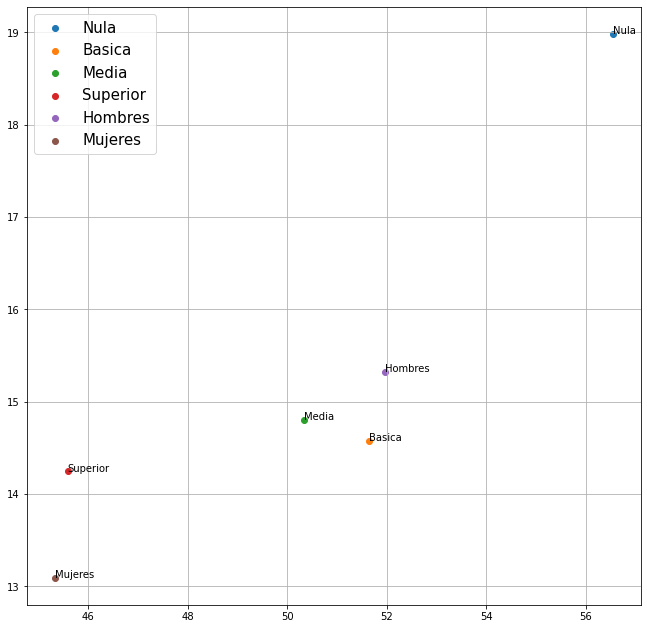

In [16]:
vec = [df_nula,df_basica,df_media,df_superior,df_hombres,df_mujeres]

x_s2_horas = arrEstimador(s2df,vec,'tot_horas')
x_s_horas = map(pow_n,x_s2_horas)
x_s_horas = list(x_s_horas)
x_media_horas = arrEstimador(np.mean,vec,'tot_horas')

legends = ['Nula','Basica','Media','Superior','Hombres','Mujeres']
plt.figure(figsize=(11,11))
for i in range(len(x_s2_horas)):
    plt.scatter(x_media_horas[i],x_s_horas[i])
    plt.annotate(legends[i], ( x_media_horas[i],x_s_horas[i]))
plt.legend(legends, fontsize="15")
plt.grid(True)

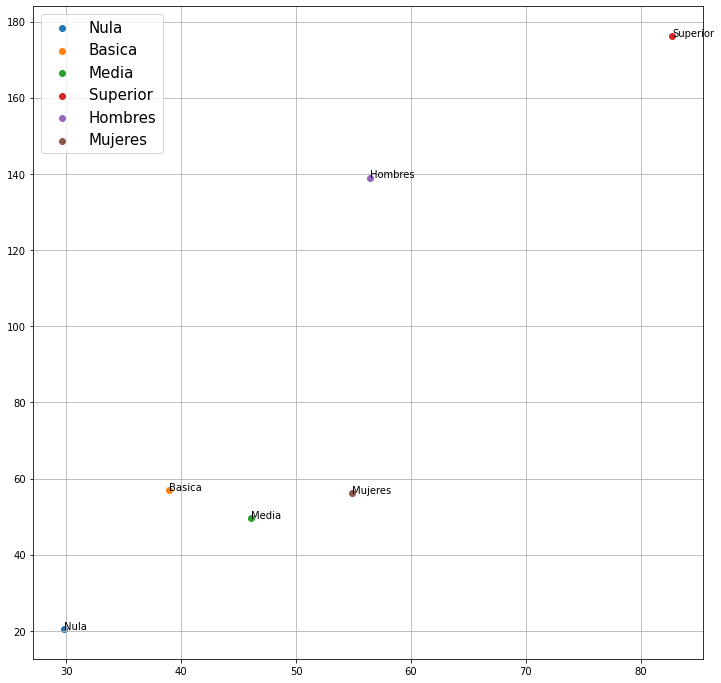

In [17]:
x_s2_ganancia = arrEstimador(s2df,vec,'ganancia_hora')
x_s_ganancia = map(pow_n,x_s2_ganancia)
x_s_ganancia = list(x_s_ganancia)
x_media_ganancia = arrEstimador(np.mean,vec,'ganancia_hora')

plt.figure(figsize=(12,12))
for i in range(len(x_s2_horas)):
    plt.scatter(x_media_ganancia[i],x_s_ganancia[i],label = legends[i])
    plt.annotate(legends[i], ( x_media_ganancia[i],x_s_ganancia[i]))
plt.legend(legends, fontsize="15")
plt.grid(True)

# Pruebas de hipotesis

### Probar si las personas por nivel educativo trabajan más que el promedio muestral

In [18]:
alfa = 0.001
h0 = 50

res = pruebaDeHipotesisSuperior(h0,df_nula['tot_horas'],alfa)

print('valor del punto crítico: ' + str(res[0]))
print('medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 56.40977563986106
medias: 56.53932584269663
Hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


## Agregar mas pruebas de hipotesis

In [19]:
df_hombres_nula = df_nula.loc[df_nula['SEXO'] == 1]
df_hombres_basica = df_basica.loc[df_basica['SEXO'] == 1]
df_hombres_media = df_media.loc[df_media['SEXO'] == 1]
df_hombres_superior = df_superior.loc[df_superior['SEXO'] == 1]
df_mujeres_nula = df_nula.loc[df_nula['SEXO'] == 2]
df_mujeres_basica = df_basica.loc[df_basica['SEXO'] == 2]
df_mujeres_media = df_media.loc[df_media['SEXO'] == 2]
df_mujeres_superior = df_superior.loc[df_superior['SEXO'] == 2]

# Numero de hombres por educacion en order creciente de educacion

In [20]:
print(len(df_hombres_nula))
print(len(df_hombres_basica))
print(len(df_hombres_media))
print(len(df_hombres_superior))

61
3374
2707
2436


# Numero de mujeres por educacion en order creciente de educacion

In [21]:
print(len(df_mujeres_nula))
print(len(df_mujeres_basica))
print(len(df_mujeres_media))
print(len(df_mujeres_superior))

28
1714
1788
2449


# Porcentaje de hombres por educacion en orden creciente de educacion

In [22]:
print(len(df_hombres_nula)/len(df_nula))
print(len(df_hombres_basica)/len(df_basica))
print(len(df_hombres_media)/len(df_media))
print(len(df_hombres_superior)/len(df_superior))

0.6853932584269663
0.66312893081761
0.6022246941045606
0.49866939611054245


In [23]:
print(len(df_mujeres_nula)/len(df_nula))
print(len(df_mujeres_basica)/len(df_basica))
print(len(df_mujeres_media)/len(df_media))
print(len(df_mujeres_superior)/len(df_superior))

0.3146067415730337
0.33687106918238996
0.39777530589543936
0.5013306038894575


# voy tomas a los que no contestaron como no por el momento, pero luego vemos que les hacemos

### cantidad de actividades en x  y frecuencia en y

<BarContainer object of 9 artists>

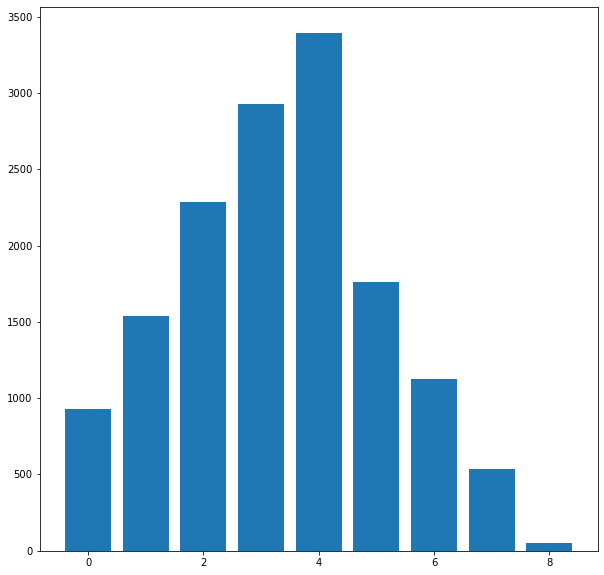

In [24]:
y = df_nuevo['tot_actividades_casa'].value_counts()
x = y.keys()      
y = y.values
plt.figure(figsize=(10,10))
plt.bar(x,y)

# Porcentajes interesantes

In [25]:
for i in range(9):
    df_h = df_hombres.loc[df_hombres['tot_actividades_casa'] >= i]
    df_m = df_mujeres.loc[df_mujeres['tot_actividades_casa'] >= i]
    print('Porcentaje de hombres que al menos realizaron ' + str(i) + ' actividades en la casa en la semana')
    print(len(df_h)/len(df_hombres))
    print('Porcentaje de mujeres que al menos realizaron ' + str(i) + ' actividades en la casa en la semana')
    print(len(df_m)/len(df_mujeres))
    print('----------------------------------------------------------------------------------------------')
    print('')

Porcentaje de hombres que al menos realizaron 0 actividades en la casa en la semana
1.0
Porcentaje de mujeres que al menos realizaron 0 actividades en la casa en la semana
1.0
----------------------------------------------------------------------------------------------

Porcentaje de hombres que al menos realizaron 1 actividades en la casa en la semana
0.900093261832595
Porcentaje de mujeres que al menos realizaron 1 actividades en la casa en la semana
0.9877906004348553
----------------------------------------------------------------------------------------------

Porcentaje de hombres que al menos realizaron 2 actividades en la casa en la semana
0.7420144555840522
Porcentaje de mujeres que al menos realizaron 2 actividades en la casa en la semana
0.9568489713998997
----------------------------------------------------------------------------------------------

Porcentaje de hombres que al menos realizaron 3 actividades en la casa en la semana
0.5328747959897412
Porcentaje de mujeres 

## Misma grafica que arriba pero solo hombres

<BarContainer object of 9 artists>

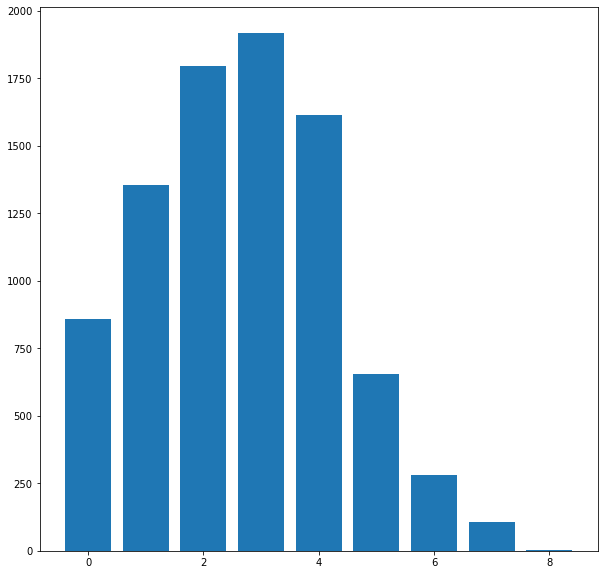

In [26]:
y = df_hombres['tot_actividades_casa'].value_counts()
x = y.keys()      
y = y.values
plt.figure(figsize=(10,10))
plt.bar(x,y)

## Misma grafica que arriba pero solo mujeres

<BarContainer object of 9 artists>

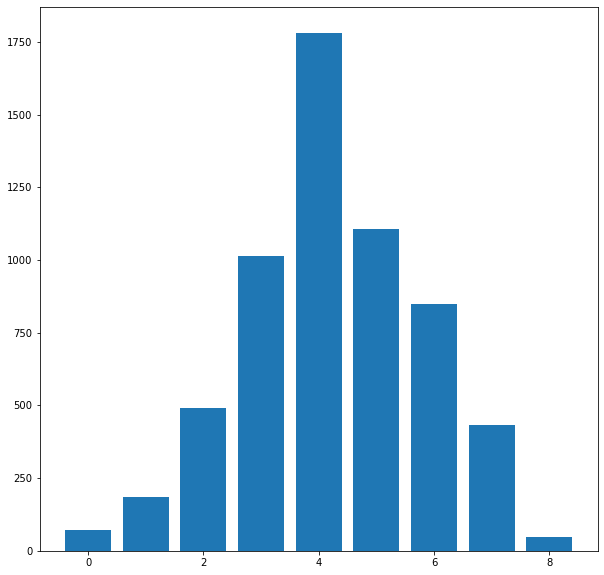

In [27]:
y = df_mujeres['tot_actividades_casa'].value_counts()
x = y.keys()      
y = y.values
plt.figure(figsize=(10,10))
plt.bar(x,y)

In [28]:
vec = ['P6_10A_7','P6_13A_3','P6_13A_5','P6_13A_6','P6_8A_2','P6_6A_3','P6_5A_2','P6_4A_3']
df_nuevo['tot_horas_casa'] = np.zeros(len(df_nuevo))
df_nuevo['tot_min_casa'] = np.zeros(len(df_nuevo))
for x in range(len(vec)):

    for i in range(4):
        nom_col = vec[x]
        nom_col = nom_col + '_' + str(i+1)
        df_nuevo[nom_col] = df_nuevo[nom_col].replace({np.nan: 0})
        df_nuevo[nom_col] = df_nuevo[nom_col].replace({'': 0})
    for i in range (2):
        nom_col = vec[x]
        nom_col = nom_col + '_' + str(i*2+1)
        df_nuevo['tot_horas_casa'] = df_nuevo['tot_horas_casa'] + df_nuevo[nom_col]
        nom_col = vec[x]
        nom_col = nom_col + '_' + str(i*2+2)
        df_nuevo['tot_min_casa'] = df_nuevo['tot_min_casa'] + df_nuevo[nom_col]

In [29]:
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,...,P6_4A_3_2,P6_4A_3_3,P6_4A_3_4,tot_actividades_casa,tot_horas,tot_minutos,semanal,ganancia_hora,tot_horas_casa,tot_min_casa
2,30,1,6,1,40,0,20,0,1.0,8300.0,...,0.0,0.0,0.0,0.0,60.0,0,2075.000000,34.583333,0.0,0.0
3,25,1,3,1,55,0,0,0,1.0,4000.0,...,0.0,0.0,0.0,1.0,55.0,0,2166.666667,39.393939,5.0,0.0
11,38,1,8,1,60,0,12,0,1.0,16708.0,...,0.0,0.0,0.0,1.0,72.0,0,9050.166667,125.696759,14.0,0.0
12,38,2,8,1,40,0,9,0,1.0,8000.0,...,0.0,5.0,0.0,4.0,49.0,0,8666.666667,176.870748,46.0,90.0
24,27,2,8,1,45,0,0,0,1.0,2400.0,...,25.0,0.0,10.0,3.0,45.0,0,2600.000000,57.777778,4.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71339,47,1,3,1,40,0,3,0,1.0,2200.0,...,20.0,0.0,0.0,2.0,43.0,0,2383.333333,55.426357,1.0,20.0
71352,40,1,3,1,50,0,0,0,1.0,1500.0,...,30.0,0.0,0.0,1.0,50.0,0,1625.000000,32.500000,2.0,30.0
71388,34,1,3,1,40,0,4,0,1.0,4000.0,...,0.0,0.0,0.0,3.0,44.0,0,2166.666667,49.242424,39.0,0.0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,...,0.0,0.0,0.0,0.0,84.0,0,3750.000000,44.642857,0.0,0.0


In [30]:
df_nuevo['tot_horas_casa'] = df_nuevo['tot_horas_casa'] + (df_nuevo['tot_min_casa']/60)

In [31]:
df_hombres = df_nuevo.loc[df_nuevo['SEXO'] == 1]
df_mujeres = df_nuevo.loc[df_nuevo['SEXO'] == 2]
print('Media de horas de los hombres utilizada para cosas del hogar')
print(np.mean(df_hombres['tot_horas_casa']))
print('Media de horas de las mujeres utilizada para cosas del hogar')
print(np.mean(df_mujeres['tot_horas_casa']))

Media de horas de los hombres utilizada para cosas del hogar
9.765848682676598
Media de horas de las mujeres utilizada para cosas del hogar
23.68267268774041


In [32]:
df_superior = df_nuevo.loc[df_nuevo['NIV'] > 7]

In [33]:
df_superior_hombres = df_superior.loc[df_superior['SEXO'] == 1]
df_superior_mujeres = df_superior.loc[df_superior['SEXO'] == 2]

In [34]:
print('Hombres y mujeres superior')
print('Cuanto ganan la hora')
print(np.mean(df_superior_hombres['ganancia_hora']))
print(np.mean(df_superior_mujeres['ganancia_hora']))
print('')
print('Cuantas horas trabajan')
print(np.mean(df_superior_hombres['tot_horas']))
print(np.mean(df_superior_mujeres['tot_horas']))
print('')
print('Cuantas horas le dedican al hogar')
print(np.mean(df_superior_hombres['tot_horas_casa']))
print(np.mean(df_superior_mujeres['tot_horas_casa']))

Hombres y mujeres superior
Cuanto ganan la hora
87.34291171209021
78.24472554719527

Cuantas horas trabajan
48.72595785440613
42.47047774601878

Cuantas horas le dedican al hogar
9.99661330049261
23.290172859670626


In [35]:
print('Hombres y mujeres general')
print('Cuanto ganan la hora')
print(np.mean(df_hombres['ganancia_hora']))
print(np.mean(df_mujeres['ganancia_hora']))
print('')
print('Cuantas horas trabajan')
print(np.mean(df_hombres['tot_horas']))
print(np.mean(df_mujeres['tot_horas']))
print('')
print('Cuantas horas le dedican al hogar')
print(np.mean(df_hombres['tot_horas_casa']))
print(np.mean(df_mujeres['tot_horas_casa']))

Hombres y mujeres general
Cuanto ganan la hora
56.463194501264454
54.833364884647374

Cuantas horas trabajan
51.961801507732964
45.33587835200982

Cuantas horas le dedican al hogar
9.765848682676598
23.68267268774041


In [36]:
df_hombres_maestria_doc = df_superior_hombres.loc[df_superior_hombres['NIV'] == 9]
df_mujeres_maestria_doc = df_superior_mujeres.loc[df_superior_mujeres['NIV'] == 9]

print(len(df_hombres_maestria_doc)/len(df_superior_hombres))
print(len(df_mujeres_maestria_doc)/len(df_superior_mujeres))

0.10426929392446634
0.11678236014699878


# Como pondria pruebas de hipotesis e intervalos en el drive 
- Intervalos de confianza para los ingresos de cada nivel educativo para probar que aumenta
- Intervalos de confianza para la proporción de hombres y mujeres por nivel educativo
- Pruebas de hipotesis para todo lo de genero entre hombres y mujeres

In [37]:
df_nula = df_nuevo.loc[df_nuevo['NIV'] == 0]
df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_nuevo.loc[df_nuevo['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_nuevo.loc[df_nuevo['NIV'] > 7]

alfa = .05

arr_pago_hora = [df_nula['ganancia_hora'],df_basica['ganancia_hora'],df_media['ganancia_hora'],df_superior['ganancia_hora']]

arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con educacion nula : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con educacion básica : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para el ingreso por hora con educacion media : ' + str(arr_inter_pago_hora[2]))
print('Intervalo de confinza para el ingreso por hora con educacion superior : ' + str(arr_inter_pago_hora[3]))

Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora con educacion nula : [25.451599312538054, 34.07361260153309]
Intervalo de confinza para el ingreso por hora con educacion básica : [37.328681303547896, 40.45552288624239]
Intervalo de confinza para el ingreso por hora con educacion media : [44.66171375537651, 47.56049665281894]
Intervalo de confinza para el ingreso por hora con educacion superior : [77.84038050977627, 87.72304458571209]


In [38]:
alfa = .1

arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con educacion nula : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con educacion básica : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para el ingreso por hora con educacion media : ' + str(arr_inter_pago_hora[2]))
print('Intervalo de confinza para el ingreso por hora con educacion superior : ' + str(arr_inter_pago_hora[3]))

Intervalo de confinza para el ingreso por hora con alfa del 0.1
Intervalo de confinza para el ingreso por hora con educacion nula : [26.15647914462921, 33.36873276944194]
Intervalo de confinza para el ingreso por hora con educacion básica : [37.5801112633094, 40.20409292648089]
Intervalo de confinza para el ingreso por hora con educacion media : [44.89481443358255, 47.3273959746129]
Intervalo de confinza para el ingreso por hora con educacion superior : [78.63505713850198, 86.92836795698638]


In [39]:
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,...,P6_4A_3_2,P6_4A_3_3,P6_4A_3_4,tot_actividades_casa,tot_horas,tot_minutos,semanal,ganancia_hora,tot_horas_casa,tot_min_casa
2,30,1,6,1,40,0,20,0,1.0,8300.0,...,0.0,0.0,0.0,0.0,60.0,0,2075.000000,34.583333,0.000000,0.0
3,25,1,3,1,55,0,0,0,1.0,4000.0,...,0.0,0.0,0.0,1.0,55.0,0,2166.666667,39.393939,5.000000,0.0
11,38,1,8,1,60,0,12,0,1.0,16708.0,...,0.0,0.0,0.0,1.0,72.0,0,9050.166667,125.696759,14.000000,0.0
12,38,2,8,1,40,0,9,0,1.0,8000.0,...,0.0,5.0,0.0,4.0,49.0,0,8666.666667,176.870748,47.500000,90.0
24,27,2,8,1,45,0,0,0,1.0,2400.0,...,25.0,0.0,10.0,3.0,45.0,0,2600.000000,57.777778,5.083333,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71339,47,1,3,1,40,0,3,0,1.0,2200.0,...,20.0,0.0,0.0,2.0,43.0,0,2383.333333,55.426357,1.333333,20.0
71352,40,1,3,1,50,0,0,0,1.0,1500.0,...,30.0,0.0,0.0,1.0,50.0,0,1625.000000,32.500000,2.500000,30.0
71388,34,1,3,1,40,0,4,0,1.0,4000.0,...,0.0,0.0,0.0,3.0,44.0,0,2166.666667,49.242424,39.000000,0.0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,...,0.0,0.0,0.0,0.0,84.0,0,3750.000000,44.642857,0.000000,0.0
